# Survival Analysis: Kaplan-Meier

## Imports

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes 
from lifelines import CoxPHFitter   
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


Hazard factors are assumed to have a proportional impact on survival

$ \large h_t  = h_0  + e^{\beta_1 x_1 + \beta_1 x_2 + ... + \beta_p x_p } $   

In [9]:
df = pd.read_csv('D:/data/csv/telco_customer-churn_cleansed.csv') 

In [3]:
durations = df['tenure'] 
event_observed = df['Churn'] 

## Cox Proportional Hazards

Prepare data: select relevant variables and take dummies

In [4]:
df_r= df.loc[:,['tenure','Churn','gender','Partner','Dependents','PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']]
df_r.head()

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [5]:
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


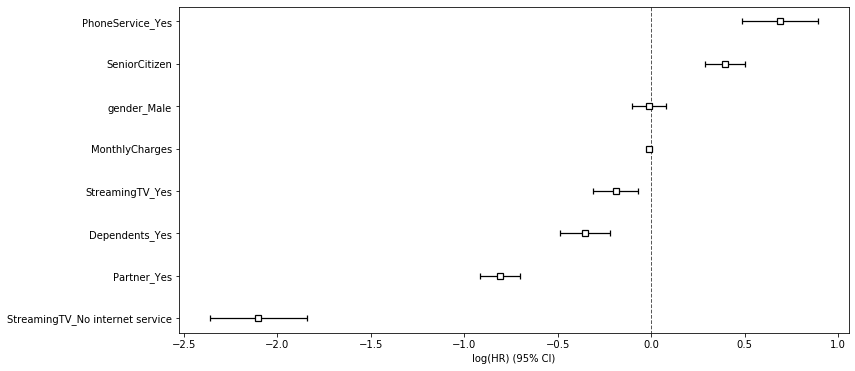

In [6]:
cph = CoxPHFitter()   
cph.fit(df_dummy, duration_col ='tenure', event_col='Churn') 
cph.print_summary()    
cph.plot();
#dir(cph) #check methods available

Taking a look at these coefficients for a moment, MonthlyCharges has a coefficient of about -0.01. Thus, a one unit increase MonthlyCharges means the the baseline
hazard will increase by a factor of exp(-0.01)=0.99 - about a 1% decrease. Recall, in the Cox proportional hazard model, a higher hazard means more at risk of the 
event occurring. The value exp(-0.01) is called the hazard ratio, a name that will be clear with another example.

In [7]:
tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


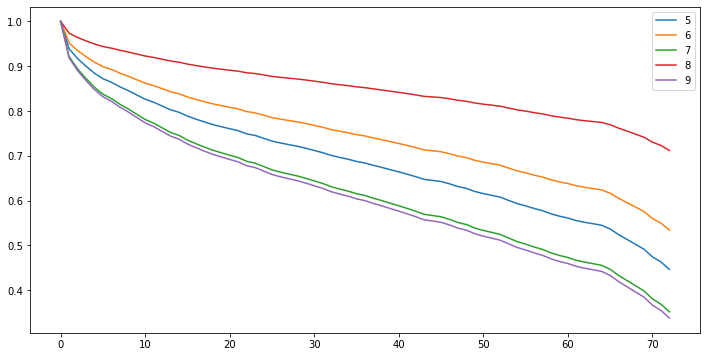

In [8]:
sf = cph.predict_survival_function(tr_rows)
sf.plot();

Also good to group by cohorts; etc.

## Credits & Links

https://github.com/anurag-code/Survival-Analysis-Intuition-Implementation-in-Python
https://www.kaggle.com/blastchar/telco-customer-churn/